### Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('future.no_silent_downcasting', True)

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("DA Project Cities.csv")
df = df.drop(columns=["cityname","state"])
df

,Count of Amenities,bathrooms,bedrooms,fee,Pets Yes/NO,price,square_feet,Cost of the City,price/sqft,average_price/sqft_city,devition_avg-price/sqft,Cost sqft of the City
0,0,1.0,1,No,Yes,2195.0,542,High Cost,4.049815,3.638827,0.410989,High Cost
1,0,1.5,3,No,Yes,1250.0,1500,Mid-range Cost,0.833333,1.188008,-0.354675,Low Cost
2,0,2.0,3,No,No,1395.0,1650,Mid-range Cost,0.845455,1.373380,-0.527926,Mid-range Cost
3,0,1.0,2,No,Yes,1600.0,820,High Cost,1.951220,2.059047,-0.107828,High Cost
4,0,1.0,1,No,Yes,975.0,624,Low Cost,1.562500,1.389053,0.173447,Mid-range Cost
...,...,...,...,...,...,...,...,...,...,...,...,...
99385,6,1.0,1,No,No,780.0,605,Mid-range Cost,1.289256,1.301306,-0.012050,Mid-range Cost
99386,13,2.0,2,No,Yes,813.0,921,Mid-range Cost,0.882736,1.329440,-0.446704,Mid-range Cost
99387,2,1.0,1,No,Yes,1325.0,650,High Cost,2.038462,2.732025,-0.693563,High Cost
99388,2,1.0,1,No,Yes,931.0,701,Mid-range Cost,1.328103,1.203260,0.124843,Low Cost


### Summary Statistics

In [3]:
df.describe()

,Count of Amenities,bathrooms,bedrooms,price,square_feet,price/sqft,average_price/sqft_city,devition_avg-price/sqft
count,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,9.939000e+04
mean,3.671556,1.445608,1.728142,1525.344250,956.386840,1.682401,1.682401,-3.622608e-13
std,3.304251,0.546925,0.748779,887.852956,386.916462,0.846346,0.695648,4.820541e-01
min,0.000000,1.000000,0.000000,100.000000,101.000000,0.047083,0.194219,-4.733335e+00
25%,1.000000,1.000000,1.000000,1014.000000,730.000000,1.120000,1.221158,-2.319310e-01
50%,3.000000,1.000000,2.000000,1350.000000,900.000000,1.469388,1.493840,-3.610956e-02
75%,5.000000,2.000000,2.000000,1795.000000,1115.000000,2.000000,1.931578,1.735570e-01
max,18.000000,9.000000,9.000000,40000.000000,40000.000000,19.038462,9.132420,1.161581e+01


### Detect Outliers

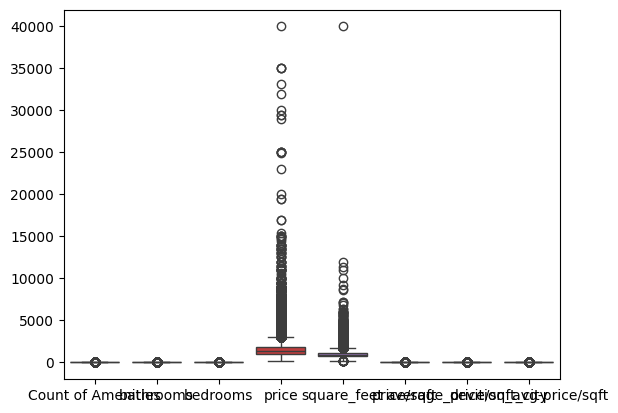

In [4]:
sns.boxplot(data=df)
plt.show()

### Remove Outliers

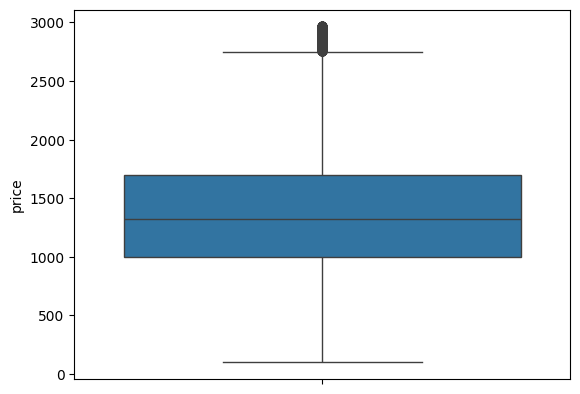

In [5]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop entire rows where 'price' is an outlier
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)].reset_index(drop=True)

# Plot boxplot
sns.boxplot(data=df, y="price")
plt.show()

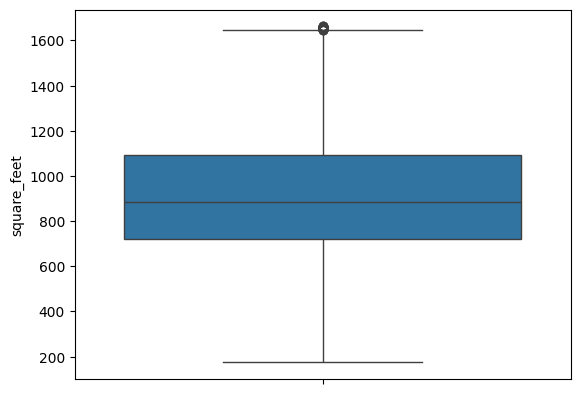

In [6]:
Q1 = df['square_feet'].quantile(0.25)
Q3 = df['square_feet'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop entire rows where 'price' is an outlier
df = df[(df['square_feet'] > lower_bound) & (df['square_feet'] < upper_bound)].reset_index(drop=True)

# Plot boxplot
sns.boxplot(data=df, y="square_feet")
plt.show()

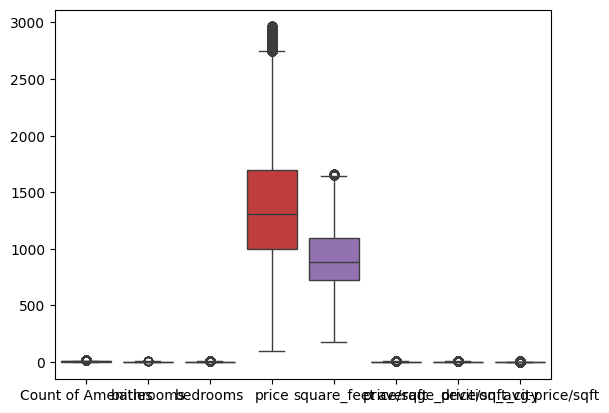

In [7]:
sns.boxplot(data=df)
plt.show()

### Label Encoding for Categorical Columns

In [8]:
df['costRange'] = df['Cost of the City'].replace({'Low Cost': 1, 'Mid-range Cost': 2, 'High Cost': 3})
df['costSqrtft'] = df['Cost sqft of the City'].replace({'Low Cost': 1, 'Mid-range Cost': 2, 'High Cost': 3})
df['fee'] = df['fee'].replace({"No": 0, "Yes": 1})
df['allowedPets'] = df['Pets Yes/NO'].replace({"No": 0, "Yes": 1})
df = df.drop(columns=["Pets Yes/NO", "Cost of the City", 'Cost sqft of the City', 'devition_avg-price/sqft'])
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets
0,0,1.0,1,0,2195.0,542,4.049815,3.638827,3,3,1
1,0,1.5,3,0,1250.0,1500,0.833333,1.188008,2,1,1
2,0,2.0,3,0,1395.0,1650,0.845455,1.373380,2,2,0
3,0,1.0,2,0,1600.0,820,1.951220,2.059047,3,3,1
4,0,1.0,1,0,975.0,624,1.562500,1.389053,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
92520,6,1.0,1,0,780.0,605,1.289256,1.301306,2,2,0
92521,13,2.0,2,0,813.0,921,0.882736,1.329440,2,2,1
92522,2,1.0,1,0,1325.0,650,2.038462,2.732025,3,3,1
92523,2,1.0,1,0,931.0,701,1.328103,1.203260,2,1,1


### Add Column: Standard Deviation to avg price/sqft

In [9]:
df['std_avg-price/sqft'] = np.sqrt((df['price/sqft'] - df['average_price/sqft_city'])**2)

### Price Distribution Histogram

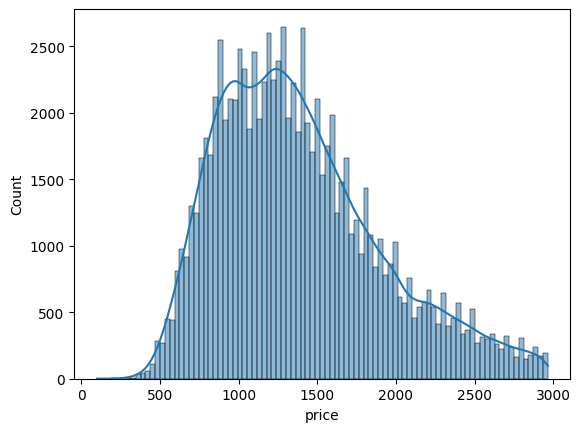

In [10]:
sns.histplot(data=df, x="price", kde=True)
plt.show()

### Binning Target Variable into Categorical Bins

In [11]:
bins = [0, 1000, 2000, 3000]  # Chia thành 5 bin đều
labels = ['Low', 'Medium', 'High']
df['price_bins'] = pd.cut(df['price'], bins=bins, labels=labels, right=True)

df['price_bins'] = pd.Categorical(df['price_bins']).codes
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets,std_avg-price/sqft,price_bins
0,0,1.0,1,0,2195.0,542,4.049815,3.638827,3,3,1,0.410989,2
1,0,1.5,3,0,1250.0,1500,0.833333,1.188008,2,1,1,0.354675,1
2,0,2.0,3,0,1395.0,1650,0.845455,1.373380,2,2,0,0.527926,1
3,0,1.0,2,0,1600.0,820,1.951220,2.059047,3,3,1,0.107828,1
4,0,1.0,1,0,975.0,624,1.562500,1.389053,1,2,1,0.173447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,6,1.0,1,0,780.0,605,1.289256,1.301306,2,2,0,0.012050,0
92521,13,2.0,2,0,813.0,921,0.882736,1.329440,2,2,1,0.446704,0
92522,2,1.0,1,0,1325.0,650,2.038462,2.732025,3,3,1,0.693563,1
92523,2,1.0,1,0,931.0,701,1.328103,1.203260,2,1,1,0.124843,0


### Pearson's Coefficients

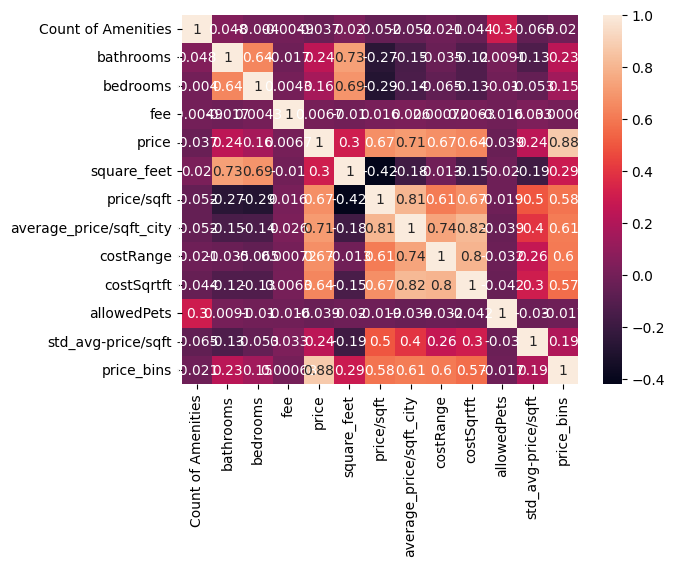

In [12]:
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

### Scaling Numeric Columns

In [13]:
from sklearn.preprocessing import StandardScaler

# Giả sử df là DataFrame của bạn
# Tạo danh sách các cột số liệu, bỏ qua cột 'price_bins'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Tạo scaler
scaler = StandardScaler()

# Chỉ scale các cột số liệu
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Hiển thị DataFrame đã được scale
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets,std_avg-price/sqft,price_bins
0,-1.122822,-0.799969,-0.983353,0,1.536910,-1.443309,3.410011,3.382088,3,3,1,0.399766,2
1,-1.122822,0.200438,1.972233,0,-0.270038,2.335197,-1.097339,-0.720720,2,1,1,0.219349,1
2,-1.122822,1.200845,1.972233,0,0.007219,2.926821,-1.080354,-0.410397,2,2,0,0.774402,1
3,-1.122822,-0.799969,0.494440,0,0.399202,-0.346832,0.469187,0.737448,3,3,1,-0.571488,1
4,-1.122822,-0.799969,-0.983353,0,-0.795869,-1.119888,-0.075537,-0.384160,1,2,1,-0.361260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,0.680772,-0.799969,-0.983353,0,-1.168732,-1.194827,-0.458441,-0.531053,2,2,0,-0.878338,0
92521,2.784964,1.200845,0.494440,0,-1.105632,0.051528,-1.028110,-0.483955,2,2,1,0.514188,0
92522,-0.521624,-0.799969,-0.983353,0,-0.126629,-1.017340,0.591442,1.864051,3,3,1,1.305066,1
92523,-0.521624,-0.799969,-0.983353,0,-0.880002,-0.816187,-0.404005,-0.695188,2,1,1,-0.516975,0


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop(columns=['price_bins','price', 'price/sqft', 'average_price/sqft_city'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Regression Models

In [15]:
df['fee'] = pd.to_numeric(df['fee'], errors='coerce')
df['costRange'] = pd.to_numeric(df['costRange'], errors='coerce')
df['costSqrtft'] = pd.to_numeric(df['costSqrtft'], errors='coerce')
df['allowedPets'] = pd.to_numeric(df['allowedPets'], errors='coerce')

In [16]:
df.dtypes

Count of Amenities         float64
bathrooms                  float64
bedrooms                   float64
fee                          int64
price                      float64
square_feet                float64
price/sqft                 float64
average_price/sqft_city    float64
costRange                    int64
costSqrtft                   int64
allowedPets                  int64
std_avg-price/sqft         float64
price_bins                    int8
dtype: object

Epoch 0 - RMSE Train: 0.0101, RMSE Test: 0.0168, R² Test: -4.1730
Epoch 1 - RMSE Train: 0.0084, RMSE Test: 0.0142, R² Test: -2.7237
Epoch 2 - RMSE Train: 0.0072, RMSE Test: 0.0123, R² Test: -1.7945
Epoch 3 - RMSE Train: 0.0062, RMSE Test: 0.0109, R² Test: -1.1977
Epoch 4 - RMSE Train: 0.0055, RMSE Test: 0.0099, R² Test: -0.8135
Epoch 5 - RMSE Train: 0.0050, RMSE Test: 0.0092, R² Test: -0.5649
Epoch 6 - RMSE Train: 0.0047, RMSE Test: 0.0087, R² Test: -0.4032
Epoch 7 - RMSE Train: 0.0044, RMSE Test: 0.0084, R² Test: -0.2968
Epoch 8 - RMSE Train: 0.0042, RMSE Test: 0.0082, R² Test: -0.2258
Epoch 9 - RMSE Train: 0.0041, RMSE Test: 0.0080, R² Test: -0.1773
Epoch 10 - RMSE Train: 0.0040, RMSE Test: 0.0079, R² Test: -0.1434
Epoch 11 - RMSE Train: 0.0040, RMSE Test: 0.0078, R² Test: -0.1186
Epoch 12 - RMSE Train: 0.0039, RMSE Test: 0.0077, R² Test: -0.0998
Epoch 13 - RMSE Train: 0.0039, RMSE Test: 0.0077, R² Test: -0.0848
Epoch 14 - RMSE Train: 0.0039, RMSE Test: 0.0076, R² Test: -0.0723
Epoch

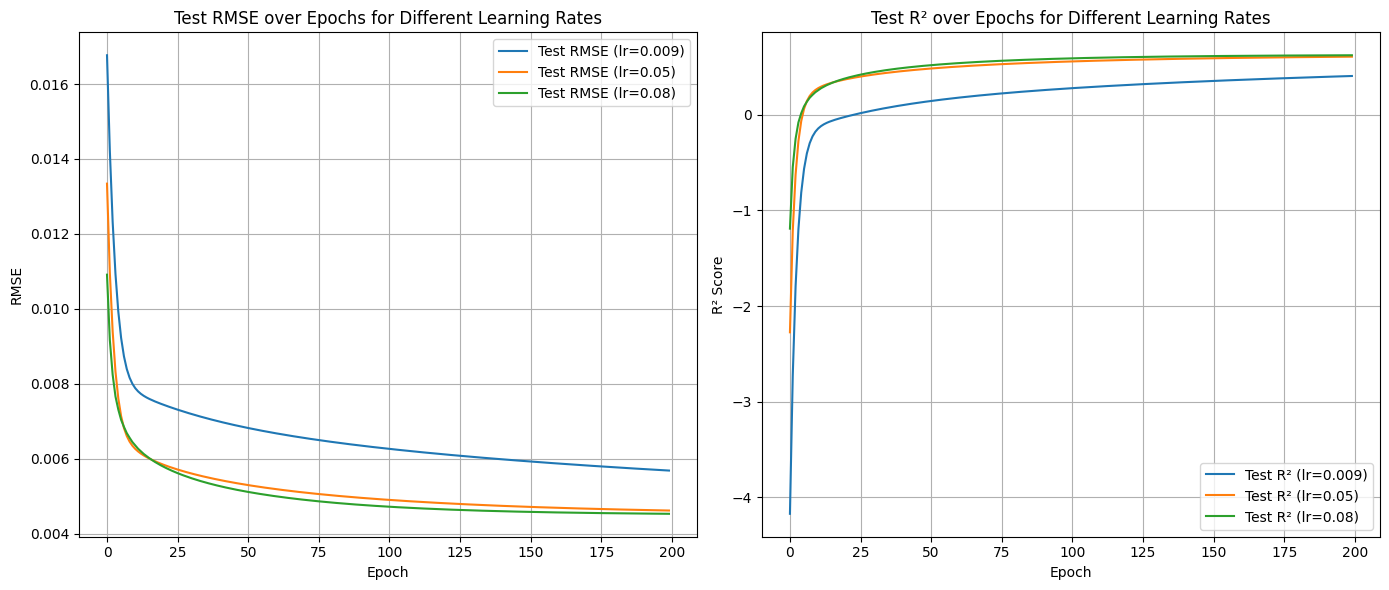

In [17]:
import numpy as np

X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)

num_samples, num_features = X_train.shape
learning_rate = [0.009, 0.05, 0.08]
num_epochs = 200

def loss_function(y_actual, y_pred, n_samples):
    mse = np.sqrt(np.sum((y_actual - y_pred)**2)) / n_samples
    return mse

def gradient(y_actual, y_pred, n_samples, x):
    return -2 / n_samples * np.dot(x.T, (y_actual - y_pred))

def gradient_intercept(y_actual, y_pred, n_samples):
    return -2 / n_samples * np.sum((y_actual - y_pred))

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - ss_residual / ss_total

# Để lưu RMSE


rmse_train_all = []
rmse_test_all = []
r2_test_all = []

for i in learning_rate:
    weight = np.random.rand(num_features)
    intercept = 0.0
    rmse_train_list = []
    rmse_test_list = []
    r2_test_list = []

    for epoch in range(num_epochs):
        y_pred_train = np.dot(X_train, weight) + intercept

        grad_x = gradient(y_train, y_pred_train, num_samples, X_train)
        grad_b = gradient_intercept(y_train, y_pred_train, num_samples)

        weight -= i * grad_x
        intercept -= i * grad_b

        epoch_rmse_train = loss_function(y_train, y_pred_train, num_samples)
        y_pred_test = np.dot(X_test, weight) + intercept
        epoch_rmse_test = loss_function(y_test, y_pred_test, len(y_test))
        epoch_r2_test = r2_score(y_test, y_pred_test)

        rmse_train_list.append(epoch_rmse_train)
        rmse_test_list.append(epoch_rmse_test)
        r2_test_list.append(epoch_r2_test)

        print(f"Epoch {epoch} - RMSE Train: {epoch_rmse_train:.4f}, RMSE Test: {epoch_rmse_test:.4f}, R² Test: {epoch_r2_test:.4f}")

    # Lưu từng learning rate vào danh sách tổng
    rmse_train_all.append((i, rmse_train_list))
    rmse_test_all.append((i, rmse_test_list))
    r2_test_all.append((i, r2_test_list))



plt.figure(figsize=(14, 6))

# --- RMSE ---
plt.subplot(1, 2, 1)
for lr, rmse_list in rmse_test_all:
    plt.plot(rmse_list, label=f'Test RMSE (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Test RMSE over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

# --- R² ---
plt.subplot(1, 2, 2)
for lr, r2_list in r2_test_all:
    plt.plot(r2_list, label=f'Test R² (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('Test R² over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)

num_samples, num_features = X_train.shape
learning_rate = [0.0008]
num_epochs = 2000

def loss_function(y_actual, y_pred, n_samples):
    mse = np.sqrt(np.sum((y_actual - y_pred)**2)) / n_samples
    return mse

def gradient(y_actual, y_pred, n_samples, x):
    return -2 / n_samples * np.dot(x.T, (y_actual - y_pred))

def gradient_intercept(y_actual, y_pred, n_samples):
    return -2 / n_samples * np.sum((y_actual - y_pred))

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - ss_residual / ss_total

# Để lưu RMSE


rmse_train_all = []
rmse_test_all = []
r2_test_all = []

from sklearn.preprocessing import PolynomialFeatures

degree = 3

poly_model = PolynomialFeatures(degree)
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.transform(X_test)
num_samples, num_features = X_train_poly.shape

for i in learning_rate:
    weight = np.random.rand(num_features)
    intercept = 0.0
    rmse_train_list = []
    rmse_test_list = []
    r2_test_list = []

    for epoch in range(num_epochs):
        y_pred_train = np.dot(X_train_poly, weight) + intercept

        grad_x = gradient(y_train, y_pred_train, num_samples, X_train_poly)
        grad_b = gradient_intercept(y_train, y_pred_train, num_samples)

        weight -= i * grad_x
        intercept -= i * grad_b

        epoch_rmse_train = loss_function(y_train, y_pred_train, num_samples)
        y_pred_test = np.dot(X_test_poly, weight) + intercept
        epoch_rmse_test = loss_function(y_test, y_pred_test, len(y_test))
        epoch_r2_test = r2_score(y_test, y_pred_test)

        rmse_train_list.append(epoch_rmse_train)
        rmse_test_list.append(epoch_rmse_test)
        r2_test_list.append(epoch_r2_test)

        print(f"Epoch {epoch} - RMSE Train: {epoch_rmse_train:.4f}, RMSE Test: {epoch_rmse_test:.4f}, R² Test: {epoch_r2_test:.4f}")

    rmse_train_all.append((i, rmse_train_list))
    rmse_test_all.append((i, rmse_test_list))
    r2_test_all.append((i, r2_test_list))




plt.figure(figsize=(14, 6))

# --- RMSE ---
plt.subplot(1, 2, 1)
for lr, rmse_list in rmse_test_all:
    plt.plot(rmse_list, label=f'Test RMSE (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Test RMSE over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

# --- R² ---
plt.subplot(1, 2, 2)
for lr, r2_list in r2_test_all:
    plt.plot(r2_list, label=f'Test R² (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('Test R² over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 0 - RMSE Train: 0.3809, RMSE Test: 1.3810, R² Test: -35087.1729
Epoch 1 - RMSE Train: 0.7070, RMSE Test: 6.3121, R² Test: -733003.2264
Epoch 2 - RMSE Train: 3.1655, RMSE Test: 30.7180, R² Test: -17359570.9225
Epoch 3 - RMSE Train: 15.5033, RMSE Test: 151.0810, R² Test: -419925030.8329
Epoch 4 - RMSE Train: 76.1722, RMSE Test: 742.2159, R² Test: -10134736620.8355
Epoch 5 - RMSE Train: 374.2957, RMSE Test: 3647.2579, R² Test: -244728725815.0195
Epoch 6 - RMSE Train: 1839.2250, RMSE Test: 17921.8534, R² Test: -5909052497769.1357
Epoch 7 - RMSE Train: 9037.6372, RMSE Test: 88065.0462, R² Test: -142678699427298.7812
Epoch 8 - RMSE Train: 44409.4039, RMSE Test: 432736.4469, R² Test: -3445077190962213.5000
Epoch 9 - RMSE Train: 218220.2179, RMSE Test: 2126393.0249, R² Test: -83183863140405760.0000
Epoch 10 - RMSE Train: 1072296.8407, RMSE Test: 10448731.6444, R² Test: -2008533863093757184.0000
Epoch 11 - RMSE Train: 5269083.3398, RMSE Test: 51343280.9367, R² Test: -48497487809998012416.

C:\Users\ACER\Documents\Python\lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23044\2418402431.py:13: RuntimeWarning: overflow encountered in square
  mse = np.sqrt(np.sum((y_actual - y_pred)**2)) / n_samples
C:\Users\ACER\AppData\Local\Temp\ipykernel_23044\2418402431.py:24: RuntimeWarning: overflow encountered in square
  ss_residual = np.sum((y_true - y_pred)**2)


Epoch 231 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 232 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 233 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 234 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 235 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 236 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 237 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 238 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 239 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 240 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 241 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 242 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 243 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 244 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 245 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 246 - RMSE Train: inf, RMSE Test: inf, R² Test: -inf
Epoch 247 - RMSE Train: inf, RMSE Test: inf, R² Test: -i